In [1]:
#0: imports

import uproot 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch

from dataAnalyse import CCV1
from torch_geometric.data import DataLoader 
from train import Net
from torch_geometric.nn import knn_graph

import numpy as np
import time
import warnings
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning)

In [2]:
# Initialize model and load state dictionary
from train import Net
model = Net(hidden_dim=128, k_value=64, contrastive_dim=8)
checkpoint= torch.load('/vols/cms/mm1221/hgcal/CLe/Hyper/results/Layer3/results_lr0.001_bs64_hd128_k64_temp0.1_cd8/best_model.pt', map_location=torch.device('cpu'))
model.load_state_dict(checkpoint)  # Directly use the loaded checkpoint
model.eval()  # Set model to evaluation mode

Net(
  (lc_encode): Sequential(
    (0): Linear(in_features=8, out_features=128, bias=True)
    (1): ELU(alpha=1.0)
    (2): Linear(in_features=128, out_features=128, bias=True)
    (3): ELU(alpha=1.0)
  )
  (conv1): DynamicEdgeConv(nn=Sequential(
    (0): Linear(in_features=256, out_features=128, bias=True)
    (1): ELU(alpha=1.0)
  ), k=64)
  (conv2): DynamicEdgeConv(nn=Sequential(
    (0): Linear(in_features=256, out_features=128, bias=True)
    (1): ELU(alpha=1.0)
  ), k=64)
  (conv3): DynamicEdgeConv(nn=Sequential(
    (0): Linear(in_features=256, out_features=128, bias=True)
    (1): ELU(alpha=1.0)
  ), k=64)
  (output): Sequential(
    (0): Linear(in_features=128, out_features=32, bias=True)
    (1): ELU(alpha=1.0)
    (2): Linear(in_features=32, out_features=16, bias=True)
    (3): ELU(alpha=1.0)
    (4): Linear(in_features=16, out_features=8, bias=True)
  )
)

In [9]:
#1: Load Data + Model
#1.1: Load Data Through the dataloader - used for predictions
testpath = "/vols/cms/mm1221/Data/2e/test/"  
data_test = CCV1(testpath, max_events=500, inp = 'test')
test_loader = DataLoader(data_test, batch_size=1, shuffle=False, follow_batch=['x'])



### Loading data


  0%|                                                     | 0/1 [00:24<?, ?it/s]

Reached 500!


In [10]:

#3: Make Predictions + Cluster -> Calculate the inference time
#3.1: Make Predictions

all_predictions = []  
total_times = []
start_time = time.time()

for i, data in enumerate(data_test):
    #edge_index = knn_graph(data.x, k=16)  
    if i > 100:
        break
    print(i)
    predictions = model(data.x, data.batch)
    all_predictions.append(predictions[0].detach().cpu().numpy())  

all_predictions = np.array(all_predictions)

#3.2: Cluster using threshold found in Script A



end_time = time.time()

#3.3: Calculate average inference time

time_diff = end_time - start_time

print("average inference time:", inference_time)



0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100


NameError: name 'inference_time' is not defined

Processing events:   0%|                                 | 0/10 [00:00<?, ?it/s]

tensor([[-0.2053,  0.5620, -0.0227,  ..., -0.6213,  0.1661,  0.3457],
        [-0.1335,  0.4286, -0.0362,  ..., -0.4750,  0.1030,  0.2488],
        [-0.5252,  0.0801, -0.1370,  ..., -0.2992,  0.1872, -0.1682],
        ...,
        [-1.5131, -1.8104, -0.2926,  ...,  1.6815,  0.0325, -2.0758],
        [ 1.1806, -1.9190,  0.0802,  ...,  2.0260, -0.8916, -1.5147],
        [-0.3017, -0.8497, -0.2484,  ...,  0.6984, -0.0890, -0.9547]])


Processing events:  10%|██▌                      | 1/10 [00:00<00:05,  1.62it/s]

[0.99890172 0.63114816 0.980546   ... 0.7280733  0.94952226 0.80263013]
[-0.96867126 -0.96475267 -0.96251988 ...  0.9285782   0.90888572
  0.97638303]
tensor([[-1.8006, -1.2614, -0.4873,  ...,  0.8806,  0.2273, -1.7685],
        [-1.6007, -1.2720, -0.4501,  ...,  0.9108,  0.1515, -1.6867],
        [-1.7716, -1.1841, -0.4667,  ...,  0.7885,  0.2279, -1.6456],
        ...,
        [ 1.2387, -1.1875,  0.2053,  ...,  1.3508, -0.6810, -0.8389],
        [-0.9801,  0.0507, -0.1991,  ..., -0.4233,  0.3196, -0.3207],
        [-0.6543, -0.1154, -0.2235,  ..., -0.1417,  0.1520, -0.4148]])


Processing events:  20%|█████                    | 2/10 [00:01<00:03,  2.08it/s]

[ 0.99826062  0.99953008  0.99533772 ... -0.69285047 -0.43695772
  0.93624574]
[-0.92198443 -0.93050838 -0.90953243 ...  0.98225653 -0.79397392
 -0.58215541]
tensor([[ 3.5629,  3.2617,  1.9766,  2.4463, -0.0584, -0.3872, -1.5793,  5.6212],
        [ 3.6031,  3.3314,  1.9939,  2.5066, -0.0363, -0.3943, -1.6078,  5.7093],
        [ 3.5342,  4.1043,  2.0688,  2.5705, -0.3373, -0.8552, -1.3926,  6.2930],
        [ 3.5522,  3.3934,  1.9576,  2.4634, -0.0618, -0.4462, -1.5733,  5.6930],
        [ 3.5706,  2.6497,  1.8625,  2.3320,  0.2022, -0.0360, -1.7334,  5.0483],
        [ 3.4740,  4.7843,  2.1157,  2.6001, -0.5815, -1.2599, -1.2204,  6.7821],
        [ 3.4016,  4.8671,  2.0842,  2.5341, -0.6373, -1.3421, -1.1491,  6.7821],
        [ 3.3490,  4.2095,  1.9578,  2.3761, -0.4596, -1.0097, -1.2643,  6.1791],
        [ 3.6093,  2.9868,  1.9529,  2.4447,  0.0785, -0.2076, -1.6771,  5.4164],
        [ 3.4467,  5.1347,  2.1426,  2.6316, -0.6591, -1.4517, -1.1289,  7.0350],
        [ 3.6481,  2.7

Processing events:  40%|██████████               | 4/10 [00:01<00:01,  3.15it/s]

[ 0.99921679  0.99968779  0.99943638 ... -0.81406647 -0.32199115
 -0.23094583]
[-0.93316984 -0.94144219 -0.92567241 ... -0.07441035  0.34319729
 -0.72932559]
tensor([[-1.0273e+00, -4.4765e-01, -3.5514e-01, -1.9982e-01, -1.8562e-01,
          4.1311e-02,  1.6999e-01, -8.2410e-01],
        [-1.0655e+00, -5.1015e-01, -3.7046e-01, -1.7714e-01, -1.9209e-01,
          8.9061e-02,  1.6665e-01, -8.9799e-01],
        [-9.3855e-01, -2.6030e-01, -2.6714e-01, -2.6866e-01, -2.5276e-01,
         -1.3826e-01,  1.9962e-01, -6.2089e-01],
        [-9.4308e-01, -2.4297e-01, -2.6447e-01, -2.7624e-01, -2.8940e-01,
         -1.6381e-01,  2.1254e-01, -5.9965e-01],
        [-4.6389e-01,  1.6810e-01, -1.1221e-01, -3.4349e-01, -3.0937e-01,
         -3.6073e-01,  1.2986e-01, -1.1461e-01],
        [-4.5213e-01, -1.6199e-01, -2.0668e-01, -3.4680e-01, -2.1611e-01,
         -7.0630e-02,  7.7705e-02, -4.3752e-01],
        [-9.3321e-01, -2.2660e-01, -2.7380e-01, -3.0523e-01, -3.2213e-01,
         -1.8319e-01,  2.1960e

Processing events:  60%|███████████████          | 6/10 [00:01<00:01,  3.60it/s]

[ 0.99878931  0.97537637  0.96601611 ...  0.87429267 -0.6690985
 -0.8992269 ]
[-0.2768923  -0.46528947 -0.28834936 ...  0.5212695   0.62332946
 -0.82242537]
tensor([[-3.9771e-01, -1.2305e+00, -2.8513e-01,  3.1880e-01,  4.5631e-01,
          1.0428e+00, -2.5186e-01, -1.3576e+00],
        [-9.5781e-01, -1.3184e+00, -4.5533e-01,  3.3983e-01,  4.4299e-01,
          1.0817e+00, -1.2204e-01, -1.6911e+00],
        [-9.7861e-01, -1.0134e+00, -4.0121e-01,  1.2808e-01,  1.8343e-01,
          6.9814e-01,  2.7220e-02, -1.3586e+00],
        [-5.1330e-01, -9.7757e-01, -2.7174e-01,  1.3291e-01,  2.3606e-01,
          7.3630e-01, -1.0664e-01, -1.1320e+00],
        [-3.2268e-01, -9.4541e-01, -2.1448e-01,  2.0292e-01,  2.9929e-01,
          7.6233e-01, -1.3538e-01, -1.0320e+00],
        [-9.3258e-01, -1.2788e+00, -4.3166e-01,  3.2310e-01,  4.1560e-01,
          1.0347e+00, -1.0594e-01, -1.6425e+00],
        [-1.3317e+00, -1.0455e+00, -4.7980e-01,  1.7763e-01,  1.8953e-01,
          6.8149e-01,  9.2615e-

Processing events:  80%|████████████████████     | 8/10 [00:02<00:00,  4.69it/s]

[0.99868405 0.93996531 0.99657273 ... 0.95574629 0.99526185 0.9789055 ]
[-0.74621141 -0.69576061 -0.62815297 ... -0.65293974 -0.59152663
 -0.65239203]
tensor([[ 9.0896e-01,  1.0312e+00,  2.6249e-01,  1.8972e-01, -2.2318e-03,
         -2.8317e-01, -2.3811e-01,  1.2386e+00],
        [ 8.7208e-01,  1.1078e+00,  2.2521e-01,  1.8381e-01, -2.7260e-02,
         -3.2805e-01, -2.6414e-01,  1.2808e+00],
        [ 5.1261e-01,  9.4451e-01,  1.6849e-01, -5.3297e-02, -1.5829e-01,
         -4.3538e-01, -7.5277e-02,  9.3725e-01],
        [ 9.8731e-01,  1.0568e+00,  2.8176e-01,  3.1541e-01,  6.9863e-02,
         -2.2402e-01, -2.8181e-01,  1.2633e+00],
        [ 1.1743e+00,  9.1804e-01,  3.3360e-01,  4.2964e-01,  1.9947e-01,
         -5.9867e-02, -3.7790e-01,  1.2457e+00],
        [ 6.8390e-01,  8.9559e-01,  1.7089e-01,  3.8627e-03, -7.6902e-02,
         -3.1408e-01, -1.9327e-01,  9.8315e-01],
        [ 7.1894e-01,  8.1435e-01,  1.9506e-01,  5.9497e-02, -2.4129e-02,
         -2.4670e-01, -1.6716e-01,  9

Processing events:  90%|██████████████████████▌  | 9/10 [00:02<00:00,  4.16it/s]

[ 0.99937165  0.99005067  0.99926949 ... -0.07186    -0.62018132
 -0.64613074]
[-0.93753797 -0.96904522 -0.84296548 ... -0.72968781 -0.57097054
  0.98643255]
tensor([[-1.2915,  1.2097,  0.2841,  ..., -1.6834,  0.8369,  0.6632],
        [-1.2103,  1.1974,  0.2826,  ..., -1.6238,  0.7811,  0.6755],
        [-1.0286,  0.5639,  0.0939,  ..., -1.0003,  0.5514,  0.1313],
        ...,
        [ 0.3827, -0.8908, -0.1380,  ...,  0.8704, -0.2840, -0.6507],
        [ 0.4104, -1.0123, -0.1189,  ...,  0.9876, -0.3331, -0.7871],
        [ 1.2462, -0.6791,  0.1906,  ...,  0.9563, -0.5320, -0.1688]])


Processing events: 100%|████████████████████████| 10/10 [00:02<00:00,  3.52it/s]

[0.99968427 0.96518421 0.9613511  ... 0.99904811 0.81750154 0.81439328]
[-0.95704091 -0.48537639 -0.52803147 ... -0.88767362 -0.89509356
 -0.49119717]


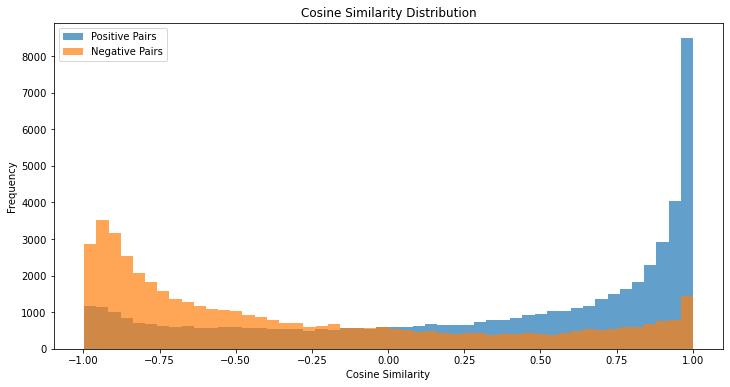

In [11]:
import numpy as np
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
from tqdm import tqdm

# Function to compute cosine similarities from a set of edge indices.
def compute_cosine_similarities(embeddings, edge_indices, skip_self=True):
    """
    Given embeddings (tensor of shape [N, D]) and edge_indices (tensor of shape [num_edges, 2]),
    compute the cosine similarity for each edge.
    If skip_self is True, edges where source==target are skipped.
    Returns a NumPy array of similarities.
    """
    sims = []
    for edge in edge_indices:
        src, tgt = edge.tolist()
        if skip_self and src == tgt:
            continue
        # Cosine similarity for unit-norm embeddings is just their dot product.
        sim = F.cosine_similarity(embeddings[src].unsqueeze(0), embeddings[tgt].unsqueeze(0))
        sims.append(sim.item())
    return np.array(sims)

# Assuming:
# - all_predictions is a list (length >= num_events) of NumPy arrays,
#   where each element is an array of embeddings for one event.
# - data_test is a list (length >= num_events) of data objects with attribute 'assoc'
#   which is an array of group labels (e.g., [0, 0, 0, 0, 1, 1, 1, 2, 2, 2, 2, 2, 2]).
# For each event, positive pairs are those nodes with the same label,
# and negative pairs are those nodes with different labels.

num_events = 10
all_pos_sims = []
all_neg_sims = []

# Loop over events.
for i in tqdm(range(num_events), desc="Processing events"):
    # Convert predictions for event i to a tensor and normalize them.
    pred_tensor = torch.tensor(all_predictions[i], dtype=torch.float32)
    print(pred_tensor)
    pred_norm = F.normalize(pred_tensor, p=2, dim=1)
    
    # Get the association labels for each node.
    # Here, assoc should be a list or array of integers.
    assoc = data_test[i].assoc  
    num_nodes = len(assoc)

    
    # Build edge lists based on the association groups.
    pos_edges = []
    neg_edges = []
    for src in range(num_nodes):
        for tgt in range(src + 1, num_nodes):  # only consider each pair once
            if assoc[src] == assoc[tgt]:
                pos_edges.append([src, tgt])
            else:
                neg_edges.append([src, tgt])

    # Convert edge lists to tensors.
    pos_edges_tensor = torch.tensor(pos_edges, dtype=torch.long)
    neg_edges_tensor = torch.tensor(neg_edges, dtype=torch.long)
    
    # Compute cosine similarities for positive and negative edges.
    pos_sims = compute_cosine_similarities(pred_norm, pos_edges_tensor, skip_self=True)
    neg_sims = compute_cosine_similarities(pred_norm, neg_edges_tensor, skip_self=True)
    print(pos_sims)
    print(neg_sims)
    all_pos_sims.extend(pos_sims.tolist())
    all_neg_sims.extend(neg_sims.tolist())

all_pos_sims = np.array(all_pos_sims)
all_neg_sims = np.array(all_neg_sims)

# Plot histograms for positive and negative cosine similarities.
plt.figure(figsize=(12, 6))
plt.hist(all_pos_sims, bins=50, alpha=0.7, label="Positive Pairs")
plt.hist(all_neg_sims, bins=50, alpha=0.7, label="Negative Pairs")
plt.xlabel("Cosine Similarity")
plt.ylabel("Frequency")
plt.title("Cosine Similarity Distribution")
plt.legend()
plt.show()
